#Importing the libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Taking the input

In [ ]:
data = "SCIP.csv"
station_name = data[0:4]
dependent_variable = "temperature"
#dependent_variable = "precipitation"
#dependent_variable = "humidity"

#Importing the dataset

In [ ]:
df = pd.read_csv(data)

#Dropping unwanted features

In [ ]:
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df.drop(['station', 'time', 'a'], axis=1, inplace=True)
df.dropna(how='all', axis=1, inplace=True)

#Taking care of missing data

In [ ]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
idf = pd.DataFrame(imputer.fit_transform(df))
idf.columns = df.columns
idf.index = df.index

#Seperating the dependent and independent variable(s) in the dataset

In [ ]:
#y is the dependent variable
#x is the independent variable

if dependent_variable == "temperature":
  x = idf[idf.columns.drop('temp_2m_avg [degF]')]
  y = idf['temp_2m_avg [degF]']                       

elif dependent_variable == "humidity":
  x = idf[idf.columns.drop('relative_humidity_avg [percent]')]
  y = idf['relative_humidity_avg [percent]']

elif dependent_variable == "precipitation":
  x = idf[idf.columns.drop('precip_total [inch]')]
  y = idf['precip_total [inch]']

#Feature scaling

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)

#reshape y into a 2D array before scaling
y = y.values.reshape(len(y), 1)
y = sc_y.fit_transform(y)

#Splitting the dataset into training set and test set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

#Training the model on training set

In [ ]:
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train.reshape(len(y_train),))

SVR()

#predicting the test set result

In [ ]:
y_pred = regressor.predict(x_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(len(y_pred), 1))

y_test = sc_y.inverse_transform(y_test.reshape(len(y_test), 1))

#print(np.concatenate((y_pred, y_test),1))

#Evaluating the performance of the model

In [ ]:
#compute R2 and MSE
r2_score = r2_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)

#Print R2 and MSE values
print(f"Accuracy is: {r2_score * 100}")
print(f"mean_squared_error is: {mean_squared_error}")

Accuracy is: 98.59608421925093
mean_squared_error is: 4.580391012283946


#Visualizing the result

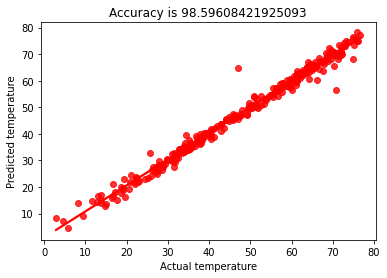

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.xlabel(f"Actual {dependent_variable}")
plt.ylabel(f"Predicted {dependent_variable}")
plt.title(f"Accuracy is {r2_score * 100}")
plt.savefig(f'{station_name}_{dependent_variable}.png')